###importing Libraries

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
Car_dataset=pd.read_csv("/content/drive/MyDrive/car data.csv")

In [45]:
Car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
Car_dataset.shape

(301, 9)

In [47]:
Car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [48]:
Car_dataset.isnull().sum().sum()

0

In [49]:
Car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [50]:
#Lets see data distributions 
print(Car_dataset['Fuel_Type'].value_counts())
print(Car_dataset.Transmission.value_counts())
print(Car_dataset['Seller_Type'].value_counts())
#print(Car_dataset.Year.value_counts())# it is already in numeric form no need 

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


##Converting Categorical data into Numeric form as MachinE Learning only accepts numeric data

In [51]:
Car_dataset.replace({'Fuel_Type':{'Diesel':1, 'Petrol':0, 'CNG':2}}, inplace=True)

In [52]:
Car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [53]:
Car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

In [54]:
Car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [55]:
#Splitting Data_set
X=Car_dataset.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
y=Car_dataset['Selling_Price']

In [56]:
print(X.shape, y.shape)

(301, 7) (301,)


##Train_Test_split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train , X_test , y_train , y_test=train_test_split(X, y , test_size=0.1 , random_state=51)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape , y_test.shape)

(270, 7) (31, 7) (270,) (31,)


#Training Model _ Linear_Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
Regressor=LinearRegression()

In [62]:
Regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
Regressor.score(X_test, y_test) 


0.8747226914183616

Root Mean Sqaure Error

In [64]:
X_train_pred=Regressor.predict(X_train)

In [65]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,X_train_pred)
rmse=np.sqrt(mse)

In [66]:
print("Mean Sqaure Error  -->",mse)
print("Root Mean Sqaure Error",rmse)

Mean Sqaure Error  --> 3.230411517025403
Root Mean Sqaure Error 1.79733455901382


##Plotting the data and prediction and see accuracy of Training

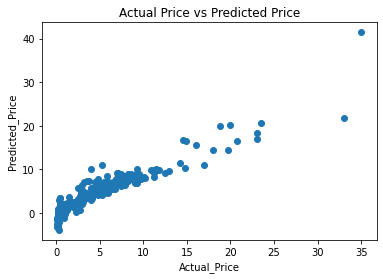

In [67]:
plt.scatter(y_train , X_train_pred)
plt.xlabel('Actual_Price')
plt.ylabel("Predicted_Price")
plt.title("Actual Price vs Predicted Price")
plt.show()# see actual and predicted are close not much gaps so it is a good model as far as training is concerned 

##Checking Score RMSE and plotting Test data

In [69]:
X_Test_data_prediction=Regressor.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,X_Test_data_prediction)
rmse=np.sqrt(mse)

In [73]:
print("Mean Sqaure Error  -->",mse)
print("Root Mean Sqaure Error",rmse)

Mean Sqaure Error  --> 2.340684753297222
Root Mean Sqaure Error 1.529929656323199


plotting

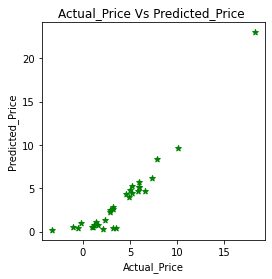

In [77]:
plt.figure(figsize=(4,4))
plt.scatter(X_Test_data_prediction, y_test, c='g', marker='*')
plt.xlabel('Actual_Price')
plt.ylabel("Predicted_Price")
plt.title("Actual_Price Vs Predicted_Price ", fontsize=12)
plt.show()

##Overall_score

In [78]:
Regressor.score(X_test, y_test) # the prediction accuracy is 87. is good

0.8747226914183616

##Prediction_System

In [83]:
input_data=(2015,5.9,60000,0,0,0,0)

prediction=Regressor.predict([input_data])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [85]:
print("Car Price ",prediction ,' Lac Rupees') # in dataset it is 4.00 so good prediction

Car Price  [4.29383331]  Lac Rupees


##Saving Model

In [86]:
import pickle 

In [87]:
pickle.dump(Regressor, open('Car_Price_Model','wb'))#Model Saved 

In [88]:
Model=pickle.load(open('Car_Price_Model','rb'))# to load model for Prediction

In [90]:
input_data=(2017,12.5,9000,1,0,0,0)

In [92]:
Prediction=Model.predict([input_data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [93]:
print(Prediction, 'Lac Rupees')

[9.80923037] Lac Rupees


In [94]:
print(Prediction.astype(int), 'Lac Rupees')#Awein

[9] Lac Rupees


END